# Credit Card Fraud Detection
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [2]:
credit = pd.read_csv('./creditcard.csv')
credit.shape

(284807, 31)

In [3]:
df = credit.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'].value_counts(normalize=True) #default는 normalize=False 인데 normalize = True 를 따로 넣으면 아래와 같이 퍼센테이지로 나온다

0    0.998273
1    0.001727
Name: Class, dtype: float64

<AxesSubplot:xlabel='Class', ylabel='count'>

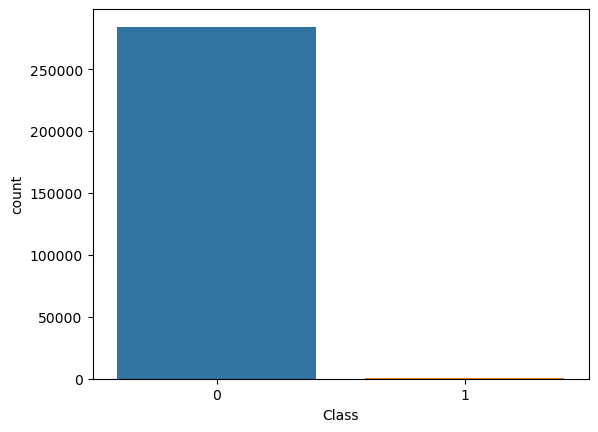

In [6]:
sns.countplot(x=df['Class']) #seaborn을 통해 bar그래프 그리기

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
X = df.drop(['Time','Class'],axis=1)
y = df['Class']

In [9]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 stratify=y,  #위와 같이 0에 데이터가 치우쳐져 있다면 stratify를 통해 0,1 에서 균등하게 뽑아온다
                                                 random_state=2022)
X_train.shape, X_test.shape                                             

((213605, 29), (71202, 29))

In [11]:
y_train.value_counts(normalize=True)  #y_train에 데이터가 적절한 비율로 분류됐는지 확인하기

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [12]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,1.772925e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [13]:
# from sklearn.preprocessing import StandardScaler #평균과 표준값(분산)을 활용하여 스케일링 하는 방식
from sklearn.preprocessing import RobustScaler #중간값과 사분위값을 활용하여 스케일링 하는 방식 (이상치의 영향을 최소화 할 수 있다)

scaler = RobustScaler()
amount = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1)) #X_train 기본 데이터 유형이 Series 였기 때문에 values를 활용하여 numpy로 바꾸고 2차원으로 reshape해준다.
amount[:10]

array([[-0.29373076],
       [ 1.09165967],
       [-0.29527008],
       [-0.04282116],
       [-0.28001679],
       [-0.18191996],
       [ 3.96725441],
       [ 0.55513574],
       [ 0.80366639],
       [ 2.77609852]])

In [14]:
X_train['Amount'] = amount.reshape(-1)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
128422,1.215333,0.801141,-0.189307,1.419017,0.008088,-1.408858,0.381728,-0.318842,-0.253099,-0.709171,...,-0.049420,-0.035684,0.013635,-0.094377,0.603550,0.678874,-0.350695,0.041712,0.062790,-0.293731
171305,1.738408,-0.491419,-0.363447,1.246371,-0.463203,0.081463,-0.435535,0.148466,0.742494,0.290212,...,-0.081259,-0.082295,-0.367354,0.245198,-0.477114,-0.426857,-0.942277,0.036408,-0.022854,1.091660
221036,-1.403107,2.011951,-1.017325,-0.609291,-0.520037,-1.193734,-0.092010,1.110164,-0.216664,-0.479891,...,-0.096649,-0.188705,-0.607803,0.247878,-0.092102,-0.308456,0.163223,0.086396,0.031273,-0.295270
149451,2.086094,0.197339,-2.035231,0.086509,0.760273,-1.259484,0.685797,-0.582541,1.138718,-0.207594,...,-0.189533,0.045950,0.497758,-0.104216,-0.316860,0.447140,0.198046,-0.115068,-0.094393,-0.042821
33474,1.237063,0.274868,0.654614,0.695816,-0.619955,-1.174747,0.084537,-0.239485,-0.011667,-0.072926,...,-0.088976,-0.233229,-0.665765,0.174009,0.712623,0.181414,0.073546,-0.027184,0.022853,-0.280017


In [15]:
y_train.value_counts()

0    213236
1       369
Name: Class, dtype: int64

In [16]:
#!pip install imbalanced-learn

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
X_train_o, y_train_o = smote.fit_resample(X_train, y_train)  #y값의 기울어진 정도를 보고 over_sampling 해서 새로 만들어준다

In [18]:
y_train_o.value_counts() # 0과 1 데이터가 균일해지게 데이터를 늘린 모습

0    213236
1    213236
Name: Class, dtype: int64

### 학습 xgboost

In [19]:
#pip install xgboost --user

In [45]:
%%time

# %%time은 이 셀을 돌렸을 때 얼마나 걸리는지 시간측정을 할 수 있게 만드는 명령어

from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators = 300, max_depth=4,
                    learning_rate = 0.1, random_state=2022)

clf.fit(X_train_o, y_train_o)

Wall time: 2min 5s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=2022, ...)

In [47]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
269516,-0.788351,1.017304,2.076547,-0.424758,-0.111348,-0.338223,0.591926,-0.079984,0.631959,-0.254340,...,0.310954,-0.243521,-0.314397,-0.297472,-0.079742,0.363853,-0.661865,0.296847,-0.020793,-0.293731
268650,0.031775,0.984943,1.946750,3.485038,0.053358,0.750247,0.292991,-0.037411,-0.810757,1.347887,...,-0.020441,0.221212,0.872030,0.241873,-0.044876,-1.858397,-0.256131,0.065699,0.097293,0.243913
233923,-0.862976,0.635569,1.703359,0.975656,0.544971,0.591933,0.315289,0.389436,0.298056,-0.451674,...,0.172197,-0.575219,-1.521491,-0.064036,0.295989,0.403143,-0.789849,0.330940,0.148762,-0.005458
29813,-0.905617,1.123705,0.921499,0.826021,0.014548,-0.219043,0.266730,0.570994,-1.011442,-0.136356,...,0.103558,0.273320,0.740480,-0.023742,0.242122,-0.288354,-0.318455,0.303056,0.124989,0.063952
18624,-1.108111,-0.219703,0.246222,-2.014915,0.252283,0.805354,-0.024774,0.536040,-0.729734,0.290439,...,0.033536,0.057153,0.210138,-0.438643,-1.708551,0.196073,-0.236755,-0.010716,-0.224976,0.796390


In [48]:
amount = scaler.transform(X_test['Amount'].values.reshape(-1,1))
X_test['Amount'] = amount.reshape(-1)
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
269516,-0.788351,1.017304,2.076547,-0.424758,-0.111348,-0.338223,0.591926,-0.079984,0.631959,-0.254340,...,0.310954,-0.243521,-0.314397,-0.297472,-0.079742,0.363853,-0.661865,0.296847,-0.020793,-0.311835
268650,0.031775,0.984943,1.946750,3.485038,0.053358,0.750247,0.292991,-0.037411,-0.810757,1.347887,...,-0.020441,0.221212,0.872030,0.241873,-0.044876,-1.858397,-0.256131,0.065699,0.097293,-0.304311
233923,-0.862976,0.635569,1.703359,0.975656,0.544971,0.591933,0.315289,0.389436,0.298056,-0.451674,...,0.172197,-0.575219,-1.521491,-0.064036,0.295989,0.403143,-0.789849,0.330940,0.148762,-0.307801
29813,-0.905617,1.123705,0.921499,0.826021,0.014548,-0.219043,0.266730,0.570994,-1.011442,-0.136356,...,0.103558,0.273320,0.740480,-0.023742,0.242122,-0.288354,-0.318455,0.303056,0.124989,-0.306830
18624,-1.108111,-0.219703,0.246222,-2.014915,0.252283,0.805354,-0.024774,0.536040,-0.729734,0.290439,...,0.033536,0.057153,0.210138,-0.438643,-1.708551,0.196073,-0.236755,-0.010716,-0.224976,-0.296580


In [49]:
y_pred = clf.predict(X_test)
my.print_score(y_test, y_pred)

accuracy :  0.9979635403499901
precision :  0.453781512605042
recall :  0.8780487804878049


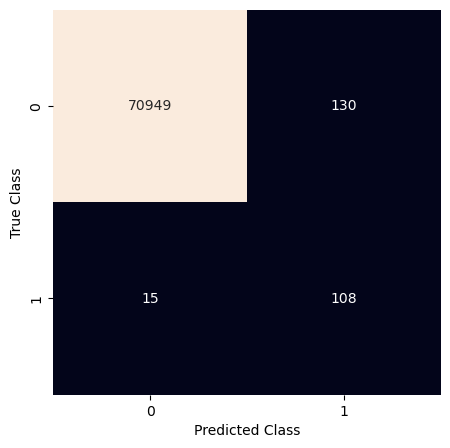

In [50]:
my.plot_confusion_matrix(y_test,y_pred) #0,0쪽 테스트 데이터가 압도적으로 많아서 저쪽에 숫자가 몰렸다.

In [46]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 8.1 MB/s eta 0:00:00


In [52]:
%%time

from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=300, max_depth=4,
                     learning_rate=0.1, random_state=2022)
clf.fit(X_train_o, y_train_o)

Wall time: 4.81 s


LGBMClassifier(max_depth=4, n_estimators=300, random_state=2022)

In [57]:
y_pred = clf.predict(X_test)
my.print_score(y_test,y_pred)

accuracy :  0.9980197185472318
precision :  0.46153846153846156
recall :  0.8780487804878049


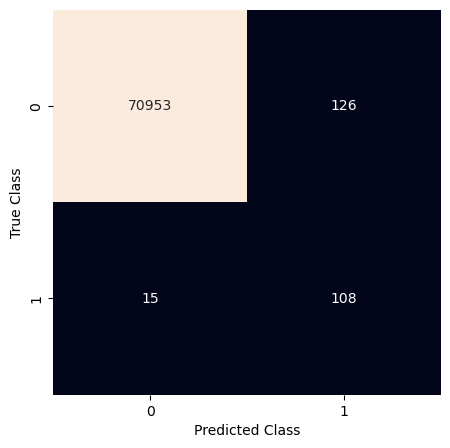

In [58]:
my.plot_confusion_matrix(y_test,y_pred)

### RandomForest

In [61]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=30, max_depth=4)
regr.fit(X_train_o,y_train_o)

RandomForestRegressor(max_depth=4, n_estimators=30)

In [64]:
y_pred = clf.predict(X_test)
my.print_score(y_test,y_pred)

accuracy :  0.9980197185472318
precision :  0.46153846153846156
recall :  0.8780487804878049


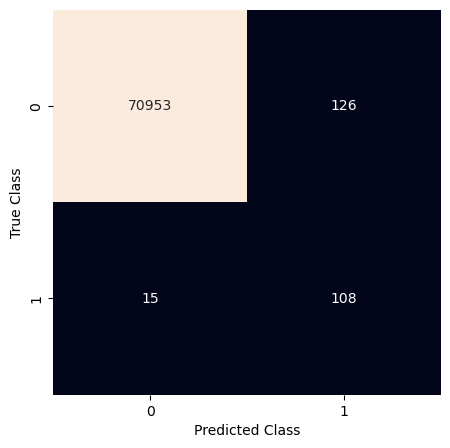

In [65]:
my.plot_confusion_matrix(y_test,y_pred)